In [1]:
from graphviz import Digraph, Graph
def defaultfunction(id1, id2):
    if type(id1) != type(id2):
        id1 = str(id1)
        id2 = str(id2)
    if id1 > id2:
        return 1
    elif id1 < id2:
        return -1
    return 0

colorPointer = 'grey'
colorRight = 'blue'
colorLeft = 'green'
colorHigh = 'red'

from DISClib.ADT import orderedmap as omap
from DISClib.ADT import list as lt
from DISClib.Algorithms.Trees import traversal as tr

class bst():
    def __init__(self):
        self.estructura = omap.newMap(omaptype = 'BST', comparefunction = defaultfunction)

    def addNode_byValue(self, infoNodo):    
        self.estructura = omap.put(self.estructura, infoNodo, infoNodo)

    def deleteNode_byValue(self, infoNodo):
        exists = omap.contains(self.estructura, infoNodo)
        self.estructura = omap.remove(self.estructura, infoNodo)
        exists2 = omap.contains(self.estructura, infoNodo)
        if (exists != exists2):
            return True
        else:
            return False

    def getNodeValues(self, order='Preorder'):
        lst = list()
        if not omap.isEmpty(self.estructura):
            if order == 'Inorder':
                iter = lt.iterator(tr.inorder(self.estructura))
            elif order == 'Preorder':
                iter = lt.iterator(tr.preorder(self.estructura))
            elif order == 'Postorder':
                iter = lt.iterator(tr.postorder(self.estructura))
            for i in iter:
                lst.append(i)
        return lst

    def isNodeValue(self, infoNodo):
        return omap.contains(self.estructura, infoNodo)

    def findAdjacentNode(self, infoNodo):
        node = omap.get(self.estructura, infoNodo)
        lst = list()
        if node != None:
            left = node['left']
            if left != None:
                print('here', left['value'])
                lst.append(left['value'])
            right = node['right']
            if right != None:
                lst.append(right['value'])
        return lst

    def getAltura(self):
        return omap.height(self.estructura)

    def visualize(self, lst = []):
        tree = self.getNodeValues()
        if len(tree) > 0:
            tree = omap.get(self.estructura, tree[0])
            # Recursively add nodes and edges
            def add_nodes_edges(tree, dot=None):
                col = "black"
                # Create Graphviz Digraph 
                if dot is None:
                    dot = Digraph()
                    dot.graph_attr = {
                        'rankdir': 'TB',
                        'center': 'true',
                        'size':'14,5',
                        'ratio':'auto'
                    }
                    dot.node(name='root', label='root', color = 'white', shape="circle", fixedsize="True", width="0.4")
                    if (lst != [] and tree['value'] in lst):
                        dot.node(name=str(tree['value']), label=str(tree['value']), color = colorHigh, shape="circle", fixedsize="True", width="0.4")
                    else:
                        dot.node(name=str(tree['value']), label=str(tree['value']), color = col, shape="circle", fixedsize="True", width="0.4")
                    dot.edge('root', str(tree['value']), color=colorPointer)      
                
                # Add nodes recursively
                if tree['left'] != None:
                    if (lst != [] and tree['left']['value'] in lst):
                        col = "red"  
                    dot.node(name=str(tree['left']['value']), label=str(tree['left']['value']),
                            color = col, shape="circle", fixedsize="True", width="0.4")
                    col = "black"
                    dot.edge(str(tree['value']), str(tree['left']['value']),color=colorLeft)
                    dot = add_nodes_edges(tree['left'], dot=dot)
                
                if tree['right'] != None:
                    if (lst != [] and tree['right']['value'] in lst): 
                        col = "red" 
                    dot.node(name=str(tree['right']['value']), label=str(tree['right']['value']), 
                            color = col, shape="circle", fixedsize="True", width="0.4")
                    col = "black"
                    dot.edge(str(tree['value']), str(tree['right']['value']), color=colorRight)
                    dot = add_nodes_edges(tree['right'], dot=dot)            
                
                return dot        
            return add_nodes_edges(tree)   
        else:
            dot = Digraph()
            dot.node(name='root', label='root', color = 'white', shape="circle", fixedsize="True", width="0.4")
            dot.node(name='-1', label='', shape="square", color='white')
            dot.edge('root', str(-1), color=colorPointer)
            return dot

In [2]:
from graphviz import Digraph, Graph
colorPointer = 'grey'
colorRight = 'blue'
colorLeft = 'green'
colorHigh = 'red'

from DISClib.ADT import orderedmap as omap
from DISClib.ADT import list as lt
from DISClib.Algorithms.Trees import traversal as tr


def defaultfunction(id1, id2):
    if type(id1) != type(id2):
        id1 = str(id1)
        id2 = str(id2)
    if id1 > id2:
        return 1
    elif id1 < id2:
        return -1
    return 0

class BST_grafico():
    def __init__(self):
        self.estructura = omap.newMap(omaptype = 'BST', comparefunction = defaultfunction)

    def addNode_byValue(self, infoNodo):    
        self.estructura = omap.put(self.estructura, infoNodo, infoNodo)

    def getNodeValues(self):
        lst = list()
        if not omap.isEmpty(self.estructura):
            iter = lt.iterator(tr.preorder(self.estructura))
            for i in iter:
                lst.append(i)
        return lst

    def visualize(self, lst = []):
        tree = self.getNodeValues()
        if len(tree) > 0:
            tree = omap.get(self.estructura, tree[0])
            # Recursively add nodes and edges
            def add_nodes_edges(tree, dot=None):
                col = "black"
                # Create Graphviz Digraph 
                if dot is None:
                    dot = Digraph()
                    dot.graph_attr = {
                        'rankdir': 'TB',
                        'center': 'true',
                        'size':'14,5',
                        'ratio':'auto'
                    }
                    dot.node(name='root', label='root', color = 'white', shape="circle", fixedsize="True", width="0.4")
                    if (lst != [] and tree['value'] in lst):
                        dot.node(name=str(tree['value']), label=str(tree['value']), color = colorHigh, shape="circle", fixedsize="True", width="0.4")
                    else:
                        dot.node(name=str(tree['value']), label=str(tree['value']), color = col, shape="circle", fixedsize="True", width="0.4")
                    dot.edge('root', str(tree['value']), color=colorPointer)      
                
                # Add nodes recursively
                if tree['left'] != None:
                    if (lst != [] and tree['left']['value'] in lst):
                        col = "red"  
                    dot.node(name=str(tree['left']['value']), label=str(tree['left']['value']),
                            color = col, shape="circle", fixedsize="True", width="0.4")
                    col = "black"
                    dot.edge(str(tree['value']), str(tree['left']['value']),color=colorLeft)
                    dot = add_nodes_edges(tree['left'], dot=dot)
                #elif tree['right'] != None:
                else:
                    aux = get_random_string()
                    dot.node(name=aux, label='',
                            color = 'white', shape="circle", fixedsize="True", width="0.4")
                    dot.edge(str(tree['value']), aux,color=colorLeft)
                    #dot = add_nodes_edges(tree['left'], dot=dot)
                
                if tree['right'] != None:
                    if (lst != [] and tree['right']['value'] in lst): 
                        col = "red" 
                    dot.node(name=str(tree['right']['value']), label=str(tree['right']['value']), 
                            color = col, shape="circle", fixedsize="True", width="0.4")
                    col = "black"
                    dot.edge(str(tree['value']), str(tree['right']['value']), color=colorRight)
                    dot = add_nodes_edges(tree['right'], dot=dot)            
                #elif tree['left'] != None:
                else:
                    aux = get_random_string()
                    dot.node(name=aux, label='',
                    color = 'white', shape="circle", fixedsize="True", width="0.4")
                    dot.edge(str(tree['value']), aux,color=colorRight)
                    #dot = add_nodes_edges(tree['left'], dot=dot)
                return dot        
            return add_nodes_edges(tree)   
        else:
            dot = Digraph()
            dot.node(name='root', label='root', color = 'white', shape="circle", fixedsize="True", width="0.4")
            dot.node(name='-1', label='', shape="square", color='white')
            dot.edge('root', str(-1), color=colorPointer)
            return dot        
        
import random
import string

def get_random_string():
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(20))
    return result_str

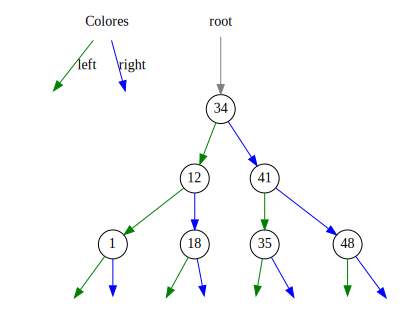

In [99]:
import graphviz as gv # for visualizing a tree using Digraph

g = Digraph('G', filename='cluster.gv')

tree = BST_grafico()
nodos = [34, 12, 1, 18, 41, 35, 48]
for i in nodos:
    tree.addNode_byValue(i)

dot = tree.visualize()



with g.subgraph(name='cluster_0') as dot2:
    dot2.node(name='colores', label='Colores', color = 'black', shape="none", fixedsize="True", width="1")
    dot2.node(name='indicativoLeft2', label='', color = 'white', shape="none", fixedsize="True", width="1")
    dot2.edge('colores', 'indicativoLeft2', color=colorLeft, label='left')
    dot2.node(name='indicativoRight2', label='', color = 'white', shape="none", fixedsize="True", width="1")
    dot2.edge('colores', 'indicativoRight2', color=colorRight, label='right')
    dot2.subgraph(dot)
display(dot2)

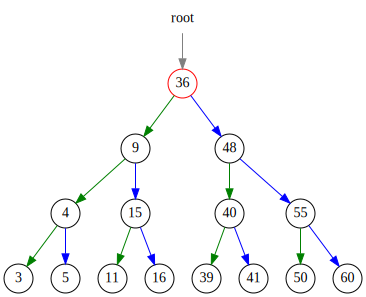

In [4]:
tree = BST_grafico()
nodos = [36,9,4,3,5,15,11,16,48,40,39,41,55,50,60]
for i in nodos:
    tree.addNode_byValue(i)

tree.visualize([36])

In [4]:
tree.deleteNode_byValue(35)
tree.getNodeValues()

[36, 9, 4, 3, 5, 15, 11, 16, 48, 40, 39, 41, 55, 50, 60]

In [5]:
node = tree.

SyntaxError: invalid syntax (1734055917.py, line 1)